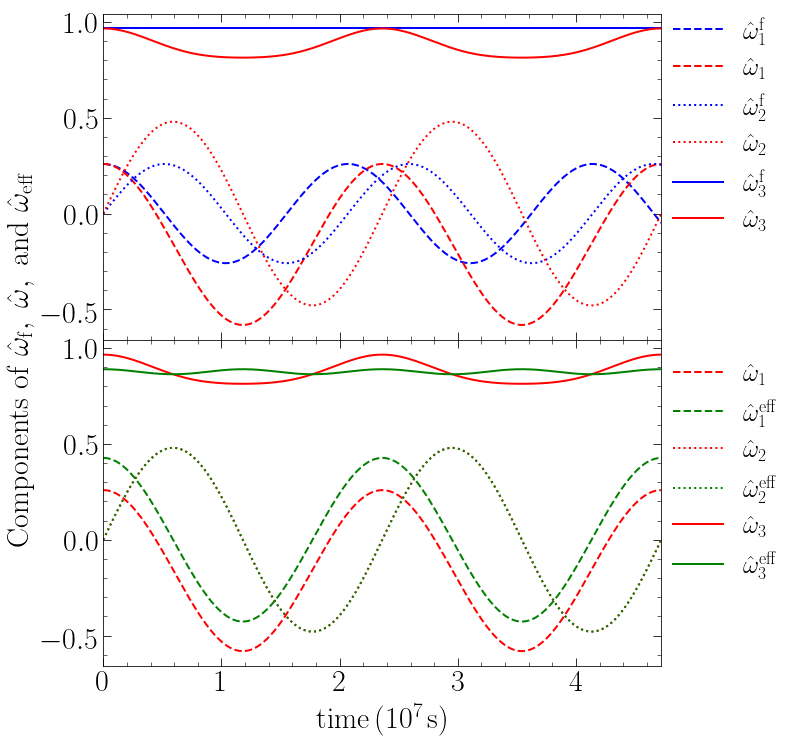

In [2]:
# import package 
import numpy as np
import matplotlib.pyplot as plt
from numpy import log10 as lg
from numpy import pi as pi
from numpy import sin as sin
from numpy import cos as cos
from scipy.interpolate import interp1d as sp_interp1d
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from scipy.integrate import ode
import warnings
import timeit
import scipy.optimize as opt
from matplotlib import cm
from astropy import constants as const
from astropy import units as u
from scipy.special import lqmn as qmn
from __future__ import division
import scipy.special as sc
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                              AutoMinorLocator)
from sympy import var, plot_implicit
import math
from math import radians as radian

# customize the plot 
plt.rcParams['xtick.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 25
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['ytick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.minor.size'] = 4
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True
plt.rcParams['axes.labelpad'] = 8.0
plt.rcParams['figure.constrained_layout.h_pad'] = 0
plt.rcParams['text.usetex'] = True
plt.rc('text', usetex=True)
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.tick_params(axis='both', which='minor', labelsize=18)
import matplotlib.ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)


# introduce constants that I use
G=const.G.cgs.value
c=const.c.cgs.value
Ms=const.M_sun.cgs.value
hbar=const.hbar.cgs.value
m_n=const.m_n.cgs.value
km=10**5
yr=(1.0*u.yr).cgs.value
plt.close()

data1=np.genfromtxt('real.dat')
data2=np.genfromtxt('free.dat')
data3=np.genfromtxt('trans.dat')
t=data1[:,0]
w1=data1[:,1]
w2=data1[:,2]
w3=data1[:,3]

wf1=data2[:,1]
wf2=data2[:,2]
wf3=data2[:,3]


we1=data3[:,1]
we2=data3[:,2]
we3=data3[:,3]


fig, (ax1,ax2)=plt.subplots(2,1, figsize=(10,12),sharex=True)
plt.subplots_adjust(hspace=0)

ax1.plot(t/10**7,wf1, linewidth=2,color='blue',label=r'$\hat{\omega}_{1}^{\rm f}$',linestyle='dashed')
ax1.plot(t/10**7,w1, linewidth=2,color='red',linestyle='dashed',label='$\hat{\omega}_{1}$')

ax1.plot(t/10**7,wf2,linewidth=2,color='blue',linestyle='dotted',label=r'$\hat{\omega}_{2}^{\rm f}$')
ax1.plot(t/10**7,w2,linewidth=2,color='red',linestyle='dotted',label='$\hat{\omega}_{2}$')

ax1.plot(t/10**7,wf3,color='blue' , linewidth=2,label=r'$\hat{\omega}_{3}^{\rm f}$')
ax1.plot(t/10**7,w3,color='red',linewidth=2,label='$\hat{\omega}_{3}$')


ax2.plot(t/10**7,w1, linewidth=2,color='red',linestyle='dashed',label='$\hat{\omega}_{1}$')
ax2.plot(t/10**7,we1, linewidth=2,color='green',linestyle='dashed',label=r'$\hat{\omega}_{1}^{\rm eff}$')

ax2.plot(t/10**7,w2,linewidth=2,color='red',linestyle='dotted',label='$\hat{\omega}_{2}$')
ax2.plot(t/10**7,we2,linewidth=2,color='green',linestyle='dotted',label=r'$\hat{\omega}_{2}^{\rm eff}$')

ax2.plot(t/10**7,w3,color='red', linewidth=2,label='$\hat{\omega}_{3}$')
ax2.plot(t/10**7,we3,color='green' , linewidth=2,label=r'$\hat{\omega}_{3}^{\rm eff}$')

ax1.tick_params(labelsize=30)
ax2.tick_params(labelsize=30)
ax1.minorticks_on()
ax2.minorticks_on()
plt.xlim(t[0]/10**7,t[-1]/10**7)
fig.text(0.01, 0.27, r'$\rm Components\  of\  \hat{{\omega}}_{\rm f},\ \hat{{\omega}},\ and\ \hat{{\omega}}_{\rm eff}$',\
         ha='center', fontsize=30,rotation='vertical')

ax2.set_xlabel(r'$\rm time\,(10^{7}\,\rm s)$',fontsize=30)

ax1.legend(frameon=False,fontsize=25,bbox_to_anchor=(0.98,1.06),ncol=1)
ax2.legend(frameon=False,fontsize=25,bbox_to_anchor=(0.98,1.0),ncol=1)
# ax2.legend(frameon=False,fontsize=25,ncol=2,loc=(0.05,0.75))
plt.savefig("../../paper/fig_near_biaxial.pdf", format='pdf', bbox_inches="tight")

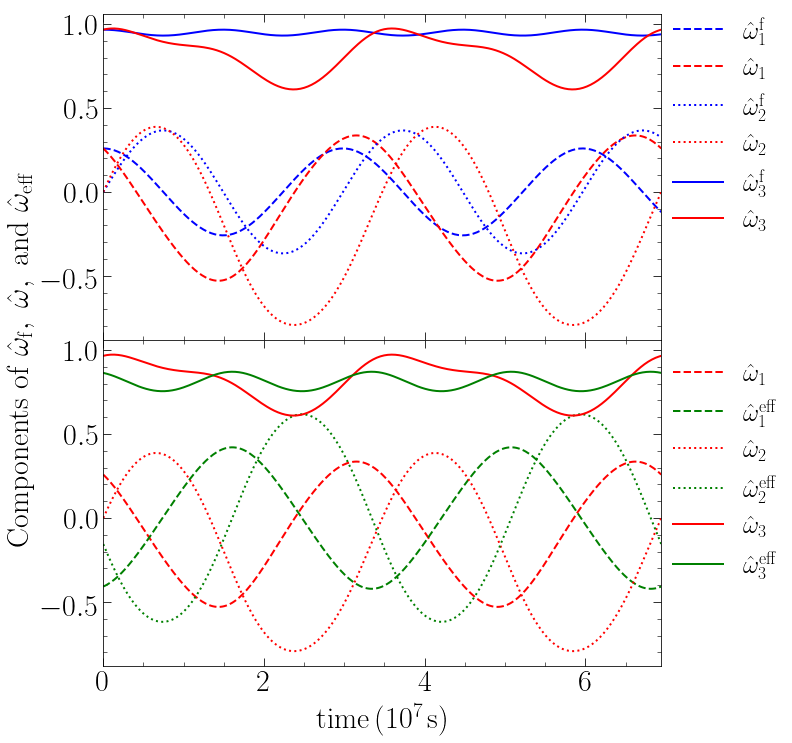

In [6]:
data1=np.genfromtxt('real1.dat')
data2=np.genfromtxt('free1.dat')
data3=np.genfromtxt('trans1.dat')
t=data1[:,0]
w1=data1[:,1]
w2=data1[:,2]
w3=data1[:,3]

wf1=data2[:,1]
wf2=data2[:,2]
wf3=data2[:,3]


we1=data3[:,1]
we2=data3[:,2]
we3=data3[:,3]


fig, (ax1,ax2)=plt.subplots(2,1, figsize=(10,12),sharex=True)
plt.subplots_adjust(hspace=0)

ax1.plot(t/10**7,wf1, linewidth=2,color='blue',label=r'$\hat{\omega}_{1}^{\rm f}$',linestyle='dashed')
ax1.plot(t/10**7,w1, linewidth=2,color='red',linestyle='dashed',label='$\hat{\omega}_{1}$')

ax1.plot(t/10**7,wf2,linewidth=2,color='blue',linestyle='dotted',label=r'$\hat{\omega}_{2}^{\rm f}$')
ax1.plot(t/10**7,w2,linewidth=2,color='red',linestyle='dotted',label='$\hat{\omega}_{2}$')

ax1.plot(t/10**7,wf3,color='blue' , linewidth=2,label=r'$\hat{\omega}_{3}^{\rm f}$')
ax1.plot(t/10**7,w3,color='red',linewidth=2,label='$\hat{\omega}_{3}$')


ax2.plot(t/10**7,w1, linewidth=2,color='red',linestyle='dashed',label='$\hat{\omega}_{1}$')
ax2.plot(t/10**7,we1, linewidth=2,color='green',linestyle='dashed',label=r'$\hat{\omega}_{1}^{\rm eff}$')

ax2.plot(t/10**7,w2,linewidth=2,color='red',linestyle='dotted',label='$\hat{\omega}_{2}$')
ax2.plot(t/10**7,we2,linewidth=2,color='green',linestyle='dotted',label=r'$\hat{\omega}_{2}^{\rm eff}$')

ax2.plot(t/10**7,w3,color='red', linewidth=2,label='$\hat{\omega}_{3}$')
ax2.plot(t/10**7,we3,color='green' , linewidth=2,label=r'$\hat{\omega}_{3}^{\rm eff}$')

ax1.tick_params(labelsize=30)
ax2.tick_params(labelsize=30)
ax1.minorticks_on()
ax2.minorticks_on()
plt.xlim(t[0]/10**7,t[-1]/10**7)
fig.text(0.01, 0.27, r'$\rm Components\  of\  \hat{{\omega}}_{\rm f},\ \hat{{\omega}},\ and\ \hat{{\omega}}_{\rm eff}$',\
         ha='center', fontsize=30,rotation='vertical')

ax2.set_xlabel(r'$\rm time\,(10^{7}\,\rm s)$',fontsize=30)

ax1.legend(frameon=False,fontsize=25,bbox_to_anchor=(0.98,1.06),ncol=1)
ax2.legend(frameon=False,fontsize=25,bbox_to_anchor=(0.98,1.0),ncol=1)
# ax2.legend(frameon=False,fontsize=25,ncol=2,loc=(0.05,0.75))
plt.savefig("../../paper/fig_near_triaxial.pdf", format='pdf', bbox_inches="tight")

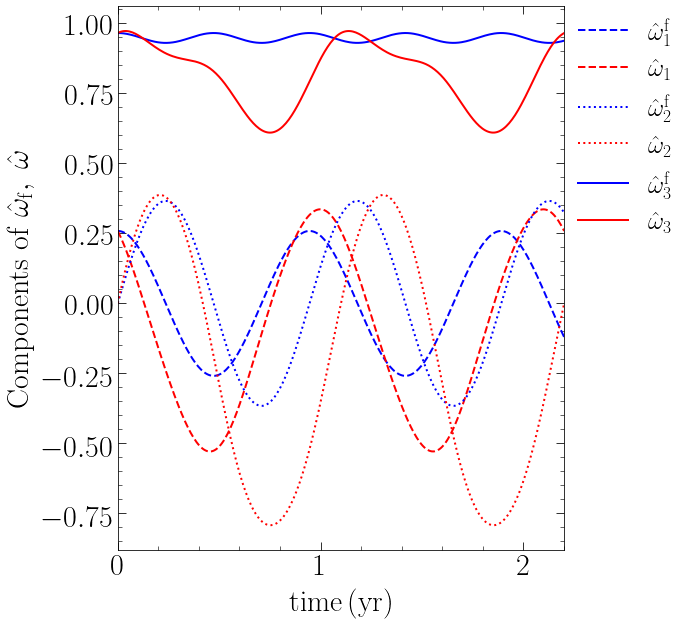

In [11]:
data1=np.genfromtxt('real1.dat')
data2=np.genfromtxt('free1.dat')
data3=np.genfromtxt('trans1.dat')
t=data1[:,0]
w1=data1[:,1]
w2=data1[:,2]
w3=data1[:,3]

wf1=data2[:,1]
wf2=data2[:,2]
wf3=data2[:,3]


we1=data3[:,1]
we2=data3[:,2]
we3=data3[:,3]


fig, ax1=plt.subplots(1,1, figsize=(8,10),sharex=True)

ax1.plot(t/yr,wf1, linewidth=2,color='blue',label=r'$\hat{\omega}_{1}^{\rm f}$',linestyle='dashed')
ax1.plot(t/yr,w1, linewidth=2,color='red',linestyle='dashed',label='$\hat{\omega}_{1}$')

ax1.plot(t/yr,wf2,linewidth=2,color='blue',linestyle='dotted',label=r'$\hat{\omega}_{2}^{\rm f}$')
ax1.plot(t/yr,w2,linewidth=2,color='red',linestyle='dotted',label='$\hat{\omega}_{2}$')

ax1.plot(t/yr,wf3,color='blue' , linewidth=2,label=r'$\hat{\omega}_{3}^{\rm f}$')
ax1.plot(t/yr,w3,color='red',linewidth=2,label='$\hat{\omega}_{3}$')


ax1.tick_params(labelsize=30)
ax1.minorticks_on()

plt.xlim(t[0]/yr,t[-1]/yr)
plt.ylabel( r'$\rm Components\  of\  \hat{{\omega}}_{\rm f},\ \hat{{\omega}}$', fontsize=30)

ax1.set_xlabel(r'$\rm time\,(\rm yr)$',fontsize=30)

ax1.legend(frameon=False,fontsize=25,bbox_to_anchor=(0.98,1.02),ncol=1)

# ax2.legend(frameon=False,fontsize=25,ncol=2,loc=(0.05,0.75))
plt.savefig("../../fig_near_triaxial.pdf", format='pdf', bbox_inches="tight")